In [4]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
  
# create data
df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
  


  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       30
1    B       20       25       15       25
2    C       12       15       19        6
3    D       10       29       13       19


<AxesSubplot:title={'center':'Grouped Bar Graph with dataframe'}, xlabel='Team'>

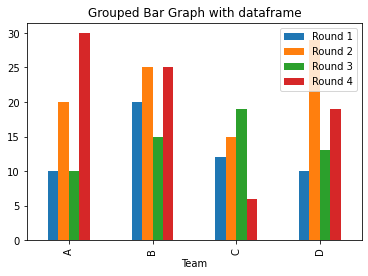

In [2]:
# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

In [3]:
df.to_csv('clean_data/one.csv') 

In [1]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


In [9]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


In [7]:
bootstrap=pd.DataFrame({'mean_rating_1':[df.sample(500,replace=True)['Round 1'].mean() for i in range(0,1000)],
                       'mean_rating_2':[df.sample(500,replace=True)['Round 2'].mean() for i in range(0,1000)],})
 
bootstrap

,mean_rating_1,mean_rating_2
0,13.112,22.350
1,12.816,22.174
2,13.060,22.548
3,13.340,22.324
4,13.168,21.700
...,...,...
995,13.260,22.368
996,13.276,21.848
997,12.988,22.350
998,13.248,22.206


In [10]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(bootstrap['mean_rating_1'],bootstrap['mean_rating_2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
green = pd.read_csv('clean_data/green.csv')
green

/var/folders/h4/vy1nwyvd5kz_n6950nl29pj80000gn/T/ipykernel_96418/2395335574.py:1: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  green = pd.read_csv('clean_data/green.csv')


,datecode,value,walking_distance_to_nearest_greenspace,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
0,2015,14.1,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
1,2015,14.4,Less than 10 minutes,All,All,All,All,All,Pensioners,All,NaN,NaN
2,2017,40.1,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
3,2016,3.1,Less than 10 minutes,All,All,All,All,All,Adults,All,NaN,NaN
4,2015,14.3,Less than 10 minutes,All,All,All,All,Owned Mortgage/Loan,All,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112765,2019,3.3,All,NaN,All,All,All,All,Adults,All,NaN,Not very strongly
112766,2014,9.6,All,NaN,All,All,All,All,All,White,NaN,Not very strongly
112767,2017,16.0,All,NaN,All,All,All,All,All,All,NaN,Not very strongly
112768,2018,16.0,All,NaN,Female,All,All,All,All,All,NaN,Not very strongly


In [3]:
green.rename(columns={'walking_distance_to_nearest_greenspace':'distance'}, inplace = True)
green = green[green.distance.isin(['Less than 10 minutes', 'More than 10 minutes'])].copy()

In [4]:
age_df =green[green.age != 'All'].copy()
age_df

,datecode,value,distance,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
2,2017,40.1,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
5,2016,36.8,Less than 10 minutes,35-64 years,All,All,All,All,All,All,NaN,NaN
15,2017,16.6,Less than 10 minutes,16-34 years,All,All,All,All,All,All,NaN,NaN
25,2014,6.0,Less than 10 minutes,35-64 years,All,All,All,All,All,All,NaN,NaN
42,2013,8.0,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
73285,2016,0.0,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Don't know
73286,2015,45.6,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Very strongly
73287,2017,4.1,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Not at all strongly
73288,2017,27.4,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Very strongly


In [5]:
age_grouped = age_df.groupby(['distance','age']).value.agg('mean').reset_index(name = 'mean')

In [6]:
age_grouped

,distance,age,mean
0,Less than 10 minutes,16-34 years,43.703058
1,Less than 10 minutes,35-64 years,43.947114
2,Less than 10 minutes,65 years and over,41.256566
3,More than 10 minutes,16-34 years,11.502446
4,More than 10 minutes,35-64 years,11.351739
5,More than 10 minutes,65 years and over,15.393506


In [10]:
pivot_age= age_grouped.pivot(index = 'age', columns = 'distance',values= 'mean').copy()

pivot_age

distance,Less than 10 minutes,More than 10 minutes
age,,
16-34 years,43.703058,11.502446
35-64 years,43.947114,11.351739
65 years and over,41.256566,15.393506


In [11]:
prop = pivot_age.reset_index()
prop['total'] = prop['Less than 10 minutes']+prop['More than 10 minutes']
prop['Less than 10 prop'] = prop['Less than 10 minutes'].div(prop['total'])
prop['More than 10 prop'] = prop['More than 10 minutes'].div(prop['total'])
prop.drop(['More than 10 minutes', 'Less than 10 minutes','total'], axis = 1, inplace = True)
prop

distance,age,Less than 10 prop,More than 10 prop
0,16-34 years,0.791643,0.208357
1,35-64 years,0.794720,0.205280
2,65 years and over,0.728270,0.271730


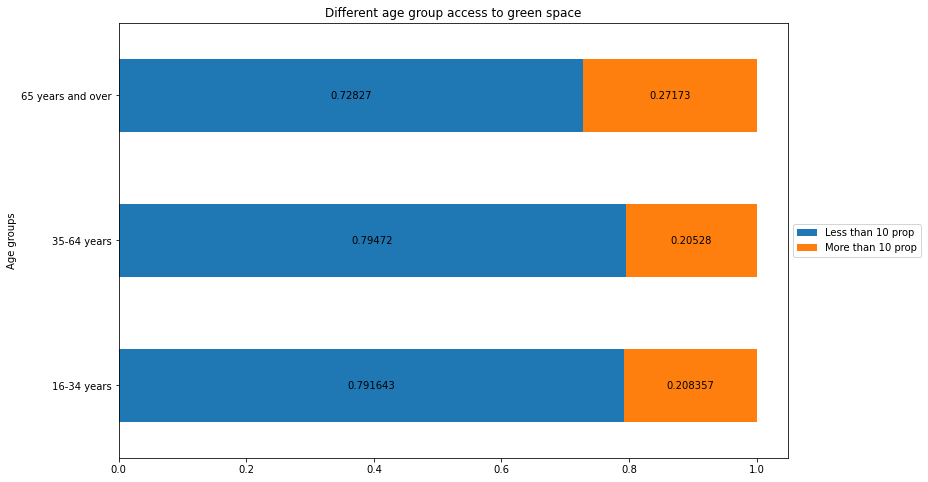

In [12]:
ax = prop.plot(
    x = 'age',
    kind = 'barh',
    stacked = True,
    title = 'Different age group access to green space',
    xlabel = 'Age groups',
    ylabel = 'Percentage',
    mark_right = True,
    figsize = (12,8))
for container in ax.containers:
    ax.bar_label(container,label_type='center')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
def propgraph (data, col1, col2, xlab, ylab, tit):
    pivot_data= data.pivot(index = col1, columns = col2,values= 'mean').copy()
    prop = pivot_data.reset_index()
    prop['total'] = prop['Less than 10 minutes']+prop['More than 10 minutes']
    prop['Less than 10 prop'] = prop['Less than 10 minutes'].div(prop['total'])
    prop['More than 10 prop'] = prop['More than 10 minutes'].div(prop['total'])
    prop.drop(['More than 10 minutes', 'Less than 10 minutes','total'], axis = 1, inplace = True)
    ax = prop.plot(
        x = col1,
        kind = 'barh',
        stacked = True,
        title = tit,
        xlabel = xlab,
        ylabel = ylab,
        mark_right = True,
        figsize = (12,8))
    for container in ax.containers:
        ax.bar_label(container,label_type='center')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Tree Testing

In [1]:
import pandas as pd 
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('clean_data/add_green.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df.drop(columns = "distance_to_nearest_green_space")
y = df["distance_to_nearest_green_space"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [52]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [47]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [53]:
predictions = clf.predict(x_test)
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [54]:
clf.predict_proba(x_test)

array([[0.5       , 0.5       ],
       [0.33333333, 0.66666667],
       [0.03125   , 0.96875   ],
       ...,
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.04      , 0.96      ]])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8224589967676283

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels = [0,1])

array([[ 104, 1070],
       [ 413, 6766]])

In [45]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8636537725009575